# Travelling Behavior Predictions

In [141]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In this project, i tried to predict people's travelling behavior by some features. It was a part of my projects for BIOS Hackathon 2019 (by Universitas Multimedia Nusantara, Indonesia: https://www.umn.ac.id/bios-hackathon-2019-buat-prototype-aplikasi-selama-24-jam/) and Jakbee Hackathon 2019 (by DKI Jakarta Governance and BAZNAS DKI Jakarta, Indonesia: https://republika.co.id/berita/q24lo69117000/baznas-gelar-puncak-jakbee-hackathon-dan-masa-depan-jakarta). 

In these two hackathons, my team created AI-powered Apps for reserving parking areas. The model that i built here was used to recommend costumers' most likely visited parking areas by their behaviors. People can also rent their home's carport, park, or some of their legal lot as a car or motorbike parking area in this apps. We believe that this apps, with sharing economy concept, can stop illegal parking growth in Indonesia. We were awarded as first winner in both competitions. Take a look for more descriptions and more visual docummentations in my LinkedIn profile:
www.linkedin.com/in/banggarakana

Thanks!

# Import Data

In this case, i use uber rides dataset from https://www.kaggle.com/ because it provides everything that i need to make the model

In [142]:
data_raw = pd.read_csv('C:/Users/Bangga Rakana Adian/Desktop/Kuliah/python/uber-rides-dataset.csv')
data_raw

,trip_completed_at,trip_status,ride_hailing_app,trip_uid,driver_uid,rider_uid,customer,trip_start_time,dayornight,trip_end_time,...,distance_kms,temperature_time,temperature_value,feels_like,humidity,wind_speed,weather_main,weather_desc,precipitation,cloudness
0,"May 11, 2015 at 6:55PM",Completed,Uber,ee89076fd9da9bddf5f096b0ca42f8d5,05cfeb269e606247fe9d2b6082942c59,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,5:26 PM,2,5:55 PM,...,9.29,2015-05-11T17:26:00,12,12,0.69,4.81,partly-cloudy-day,Mostly Cloudy,0,0.78
1,"May 11, 2015 at 8:12PM",Completed,Uber,518be51d403944a03c47e8d1f2c87311,4a4e248742f9d5ff517c5bbbb48d0e54,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,6:46 PM,3,7:12 PM,...,9.93,2015-05-11T18:46:00,10,10,0.70,6.53,partly-cloudy-day,Mostly Cloudy,0,0.66
2,"May 13, 2015 at 11:38AM",Completed,Uber,6e460cc8a12c3c6568d0d4a67ac58393,cb249a2bd807ca78697b4ed0348c37da,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,9:15 AM,1,10:38 AM,...,18.01,2015-05-13T09:15:00,14,14,0.61,5.25,partly-cloudy-day,Mostly Cloudy,0,0.86
3,"May 16, 2015 at 1:44AM",Completed,Uber,49613a86a04e6c15d72b51d1a2935d81,d3f73f8151c2e8c34b541f961db7f5fa,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,12:24 AM,1,12:44 AM,...,5.10,2015-05-16T00:24:00,3,3,0.84,0.87,partly-cloudy-night,Partly Cloudy,0,0.56
4,"May 16, 2015 at 3:18AM",Completed,Uber,9896148fdecdb4c5d977a8691510bdb6,1287d21e6455ee40d4861f6b91c680f4,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,1:29 AM,1,2:18 AM,...,21.92,2015-05-16T01:29:00,3,1,0.90,1.61,partly-cloudy-night,Partly Cloudy,0,0.31
5,"May 18, 2015 at 11:06AM",Completed,Uber,5c0312a92ff104197d799c42ae67542f,fc6b1516376f15c97e508d904505d27a,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,9:32 AM,1,10:06 AM,...,4.88,2015-05-18T09:32:00,7,5,0.83,2.73,cloudy,Overcast,0,0.99
6,"May 18, 2015 at 11:08PM",Completed,Uber,4ad2e954813b53afeb73ce659ac3376c,1b926e88a8477f7b5d1fad298e00fb11,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,9:24 PM,3,10:08 PM,...,18.65,2015-05-18T21:24:00,6,3,0.89,4.08,cloudy,Overcast,0,0.98
7,"May 19, 2015 at 9:10AM",Completed,Uber,1e3935b05addc654d65e72b8da96fd43,439ae2cf8ae38bc24b2f8dbc3f0b987d,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,7:12 AM,1,8:10 AM,...,12.62,2015-05-19T07:12:00,6,4,0.96,3.96,partly-cloudy-day,Mostly Cloudy,0,0.89
8,"May 19, 2015 at 12:37PM",Completed,Uber,0eb9a9f7a3fd598c885c67af75645c06,75a4c47c323bcc96ac5849052b19ed5f,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,11:22 AM,1,11:37 AM,...,5.94,2015-05-19T11:22:00,8,5,0.88,4.64,partly-cloudy-day,Mostly Cloudy,0,0.84
9,"May 19, 2015 at 10:33PM",Completed,Uber,b56495d149fea002e04438a3369ab532,176f50c4249ddc7b086d8997349d9ae5,3ffa4a71a5aa791a8bc3409f5b15b936,stantyan,9:00 PM,3,9:33 PM,...,17.38,2015-05-19T21:00:00,9,9,0.82,0.86,partly-cloudy-day,Mostly Cloudy,0,0.69


# Exploratory Data Analysis & Feature Engineering

In [143]:
data_raw.dtypes

trip_completed_at         object
trip_status               object
ride_hailing_app          object
trip_uid                  object
driver_uid                object
rider_uid                 object
customer                  object
trip_start_time           object
dayornight                 int64
trip_end_time             object
trip_time                 object
total_time                object
wait_time                 object
trip_type                 object
surge_multiplier         float64
vehicle_make_model        object
vehicle_license_plate     object
driver_name_en            object
vehicle_make              object
vehicle_model             object
driver_gender             object
driver_photo_url          object
driver_phone_number       object
pickup_lat               float64
pickup_long              float64
dropoff_lat              float64
dropoff_long             float64
trip_map_image_url        object
trip_path_image_url       object
city                      object
country   

In [144]:
data_raw['city'].value_counts()

Saint Petersburg    640
Ekaterinburg         28
Moscow               10
Name: city, dtype: int64

In [145]:
city = data_raw['city'].replace(('Saint Petersburg', 'Ekaterinburg', 'Moscow'), (1,2,3))
data_raw['City'] = city

In [146]:
data_raw['trip_status'].value_counts()

Completed    668
Cancelled     10
Name: trip_status, dtype: int64

In [147]:
trip_status = data_raw['trip_status'].replace(('Completed', 'Cancelled'), (1,0))
data_raw['trip_completeness'] = trip_status

In [148]:
data_raw['weather_main'].value_counts()

partly-cloudy-day      281
cloudy                 171
partly-cloudy-night    106
clear-day               57
wind                    15
rain                    14
clear-night             12
fog                     11
snow                    11
Name: weather_main, dtype: int64

In [149]:
weather_main = data_raw['weather_main'].replace(('partly-cloudy-day','cloudy','partly-cloudy-night','clear-day','wind','rain','clear-night','fog','snow'),(9,8,7,6,5,4,3,2,1))
data_raw['weather'] = weather_main

In [150]:
dataset = data_raw[['pickup_long','City','dayornight','weather','distance_kms','trip_completeness','temperature_value','dropoff_long']]
dataset

,pickup_long,City,dayornight,weather,distance_kms,trip_completeness,temperature_value,dropoff_long
0,30.329826,1,2,9,9.29,1,12,30.307655
1,30.307313,1,3,9,9.93,1,10,30.329495
2,30.329416,1,1,9,18.01,1,14,30.387561
3,30.311159,1,1,7,5.10,1,3,30.308489
4,30.308553,1,1,7,21.92,1,3,30.329402
5,30.321773,1,1,8,4.88,1,7,30.388147
6,30.387829,1,3,8,18.65,1,6,30.329518
7,30.330248,1,1,9,12.62,1,6,30.359076
8,30.356079,1,1,9,5.94,1,8,30.388656
9,30.388166,1,3,9,17.38,1,9,30.329493


In [160]:
dataset.dtypes

pickup_long          float64
City                   int64
dayornight             int64
weather                int64
distance_kms         float64
trip_completeness      int64
temperature_value      int64
dropoff_long         float64
dtype: object

In [152]:
a = dataset['distance_kms'].mean()
b = dataset['distance_kms'].max()
c = dataset['distance_kms'].min()
print('Average distances of travelling = {}\nMaximum distances of travelling = {}\nMinimum distances of travelling = {}'.format(a,b,c))

Average distances of travelling = 10.057787610619469
Maximum distances of travelling = 46.74
Minimum distances of travelling = 0.01


It's the most important part of my model. Above, we can see that mostly people travelled for ~10.06 kilometers. I can assume that most of them (maybe all of them) travelled in the same city or at least in the same specific scope areas. Now, take a look at the graph below:

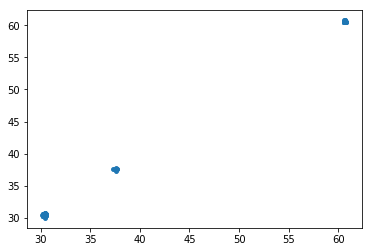

In [166]:
plt.scatter(x=dataset['pickup_long'], y=dataset['dropoff_long'], s=15)

# Modelling

In [123]:
array = dataset.values
X = array[:, 0:6]
Y = array[:, 6]


x_train = X[:int(.6 * len(Y))]
x_test = X[int(.6 * len(Y)):int(.9 * len(Y))]
y_train = Y[:int(.6 * len(Y))]
y_test = Y[int(.6 * len(Y)):int(.9 * len(Y))]
val_x = X[:int(.9 * len(Y))]
val_y = Y[:int(.9 * len(Y))]

In [126]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 9.99594508e-01  1.26766703e-04  2.99990923e-03 -4.00748668e-03
 -1.12212527e-02 -1.55861048e-04]
Mean squared error: 0.01
Coefficient of determination: 0.99


array([30.32055205, 30.30135953, 30.31683066, 30.30831071, 30.30570586,
       30.31428957, 30.38647376, 30.31890901, 30.34441824, 30.38233637,
       30.31455153, 60.7933719 , 60.79228637, 60.58892027, 60.5941822 ,
       60.61174565, 60.60147291, 60.59406309, 60.60002764, 30.32868055,
       30.30017952, 30.27142696, 30.34318312, 30.39574847, 30.33108258,
       30.33517843, 30.33139685, 30.34715921, 30.39502931, 30.26118752,
       30.32485009, 30.27581126, 30.32028226, 30.34720084, 30.35118695,
       30.34982464, 30.28955884, 30.32626578, 30.34301464, 30.32052332,
       30.27386167, 30.33799048, 30.32275564, 30.33211196, 30.36295513,
       30.32816337, 30.34566169, 30.34168623, 30.408057  , 30.40727965,
       30.37882216, 60.59082541, 60.57733276, 60.5284733 , 60.78762686,
       60.58813968, 60.5731722 , 60.56111981, 60.60341596, 60.60755556,
       60.59542104, 30.40799218, 30.29850341, 60.58981332, 60.7897633 ,
       30.26369879, 30.38554489, 30.4066105 , 30.36810614, 30.39

In [129]:
print('Look how accurate the model is: \n\nPrediction for val_x data = \n{} \n\n\nval_y = \n{}'.format(model.predict(val_x), val_y))

Look how accurate the model is: 

Prediction for val_x data = 
[30.32055205 30.30135953 30.31683066 30.30831071 30.30570586 30.31428957
 30.38647376 30.31890901 30.34441824 30.38233637 30.31455153 60.7933719
 60.79228637 60.58892027 60.5941822  60.61174565 60.60147291 60.59406309
 60.60002764 30.32868055 30.30017952 30.27142696 30.34318312 30.39574847
 30.33108258 30.33517843 30.33139685 30.34715921 30.39502931 30.26118752
 30.32485009 30.27581126 30.32028226 30.34720084 30.35118695 30.34982464
 30.28955884 30.32626578 30.34301464 30.32052332 30.27386167 30.33799048
 30.32275564 30.33211196 30.36295513 30.32816337 30.34566169 30.34168623
 30.408057   30.40727965 30.37882216 60.59082541 60.57733276 60.5284733
 60.78762686 60.58813968 60.5731722  60.56111981 60.60341596 60.60755556
 60.59542104 30.40799218 30.29850341 60.58981332 60.7897633  30.26369879
 30.38554489 30.4066105  30.36810614 30.39911053 30.39928116 60.56208544
 30.28481837 30.38675624 30.39929286 30.39680052 30.37813751 60

Since the average of travel distances is around 10 kilometers, which means most of people traveled in a specific scope area, the model must provides very low errors and good r2 scores. I got 1% MSE and 99% R2 Score